<a href="https://colab.research.google.com/github/FaezeM/NLP_Bambara/blob/main/similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from transformers import AutoModel, AutoTokenizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
bam_embeddings_loc = np.load('/content/bam_embeddings_1000.npy')
en_embeddings_loc = np.load('/content/en_embeddings_1000.npy')
fr_embeddings_loc = np.load('/content/fr_embeddings_1000.npy')

In [72]:
bam_embeddings = np.load('/content/drive/MyDrive/embeddings/bam_embeddings.npy')
en_embeddings = np.load('/content/drive/MyDrive/embeddings/en_embeddings.npy')
fr_embeddings = np.load('/content/drive/MyDrive/embeddings/fr_embeddings.npy')

In [4]:
print(bam_embeddings.shape)

(908, 354, 768)


In [8]:
print(bam_embeddings_loc.shape)

(908, 354, 768)


In [5]:
def cosine_sim(em1, em2):

    em1_means = np.mean(em1, axis=1)
    em2_means = np.mean(em2, axis=1)

    similarities = []
    for em1_vec, em2_vec in zip(em1_means, em2_means):
        similarity = np.dot(em1_vec, em2_vec) / (np.linalg.norm(em1_vec) * np.linalg.norm(em2_vec))
        similarities.append(similarity)

    return np.array(similarities)


In [6]:
def euclidean_dist(em1, em2):

    em1_means = np.mean(em1, axis=1)
    em2_means = np.mean(em2, axis=1)

    similarities = []
    for em1_vec, em2_vec in zip(em1_means, em2_means):
        distance = np.linalg.norm(em1_vec - em2_vec)
        similarity = 1 / (1 + distance)
        similarities.append(similarity)

    return np.array(similarities)

In [9]:
cosine_sim(bam_embeddings_loc, bam_embeddings_loc)

array([0.9999999 , 1.0000001 , 1.0000001 , 0.9999999 , 1.        ,
       1.        , 1.        , 0.99999994, 1.0000001 , 1.0000001 ,
       0.99999994, 1.        , 1.0000001 , 0.99999994, 1.        ,
       0.99999994, 1.0000001 , 1.        , 1.0000001 , 1.0000001 ,
       1.0000001 , 1.0000001 , 0.99999994, 0.99999994, 1.        ,
       1.0000001 , 1.        , 0.99999994, 1.        , 1.0000001 ,
       1.        , 1.        , 1.        , 1.0000001 , 1.        ,
       0.99999994, 1.        , 0.99999994, 1.        , 1.        ,
       1.0000001 , 1.        , 1.        , 1.0000001 , 1.0000001 ,
       1.0000001 , 1.0000001 , 0.99999994, 0.99999994, 1.0000001 ,
       1.0000001 , 0.99999994, 0.99999994, 0.9999999 , 1.        ,
       1.0000001 , 1.0000001 , 1.        , 1.0000001 , 1.0000001 ,
       1.        , 1.0000001 , 1.        , 1.        , 1.        ,
       1.        , 1.0000001 , 1.0000001 , 1.        , 1.        ,
       1.        , 1.        , 1.0000001 , 1.        , 1.     

In [ ]:
cosine_sim(bam_embeddings, bam_embeddings)

array([1.0000001 , 1.0000001 , 0.99999994, 0.9999999 , 0.99999994,
       1.        , 1.        , 0.99999994, 1.        , 1.0000001 ,
       1.        , 1.        , 1.        , 1.0000001 , 1.0000001 ,
       0.99999994, 1.0000001 , 0.99999994, 1.        , 1.        ,
       1.        , 1.        , 0.99999994, 1.0000001 , 1.0000001 ,
       1.0000001 , 1.        , 0.99999994, 1.        , 1.        ,
       1.        , 1.0000001 , 1.0000001 , 0.99999994, 0.99999994,
       1.0000001 , 1.        , 1.        , 1.0000001 , 1.        ,
       1.        , 1.        , 1.0000001 , 1.        , 1.        ,
       1.0000001 , 1.        , 0.99999994, 0.99999994, 1.        ,
       0.9999999 , 1.        , 0.99999994, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.0000001 , 1.0000001 ,
       1.0000001 , 1.        , 1.        , 0.99999994, 0.99999994,
       0.99999994, 1.0000001 , 1.        , 1.        , 0.99999994,
       1.        , 0.99999994, 0.99999994, 1.        , 1.     

In [10]:
euclidean_dist(bam_embeddings_loc, bam_embeddings_loc)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
euclidean_dist(bam_embeddings, bam_embeddings)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [11]:
cosine_bam_en_loc = cosine_sim(bam_embeddings_loc, en_embeddings_loc)
cosine_bam_en_loc

array([0.63856757, 0.60348153, 0.679811  , 0.70277166, 0.68825686,
       0.71049374, 0.68097734, 0.71470374, 0.668401  , 0.76904005,
       0.62084866, 0.5320029 , 0.6927857 , 0.7316845 , 0.51209587,
       0.53362685, 0.67427033, 0.70131284, 0.4695037 , 0.598501  ,
       0.62156385, 0.56118304, 0.6034634 , 0.7112521 , 0.68266845,
       0.692118  , 0.48167452, 0.5095773 , 0.6732655 , 0.68289983,
       0.613289  , 0.57203263, 0.66430926, 0.4870077 , 0.73934716,
       0.623464  , 0.6884893 , 0.7556102 , 0.5638    , 0.4476223 ,
       0.49958596, 0.58818144, 0.6317008 , 0.53749955, 0.811963  ,
       0.683362  , 0.5767435 , 0.68006164, 0.57867795, 0.71617544,
       0.5647015 , 0.73212945, 0.5461633 , 0.7763549 , 0.61217505,
       0.6867336 , 0.63812584, 0.6489727 , 0.60850674, 0.6420348 ,
       0.58429575, 0.6695856 , 0.6591354 , 0.67687374, 0.63972014,
       0.6908645 , 0.6520214 , 0.61154425, 0.5501008 , 0.40674093,
       0.5829647 , 0.7438694 , 0.5351385 , 0.6001567 , 0.67429

In [ ]:
cosine_bam_en = cosine_sim(bam_embeddings, en_embeddings)
cosine_bam_en

array([0.6385678 , 0.6034815 , 0.6798109 , 0.7027718 , 0.68825674,
       0.71049356, 0.6809772 , 0.7147039 , 0.6684008 , 0.76904   ,
       0.62084836, 0.5320029 , 0.6927854 , 0.7316845 , 0.5120958 ,
       0.5336267 , 0.6742702 , 0.70131266, 0.46950346, 0.5985009 ,
       0.62156385, 0.5611829 , 0.6034633 , 0.7112521 , 0.6826683 ,
       0.69211817, 0.48167446, 0.509577  , 0.67326534, 0.6828997 ,
       0.6132888 , 0.57203245, 0.664309  , 0.48700753, 0.73934686,
       0.6234639 , 0.6884891 , 0.7556099 , 0.56380016, 0.44762215,
       0.49958566, 0.58818144, 0.63170093, 0.53749925, 0.81196296,
       0.68336207, 0.5767435 , 0.6800613 , 0.57867765, 0.7161753 ,
       0.56470144, 0.73212934, 0.5461634 , 0.77635485, 0.61217505,
       0.68673354, 0.6381255 , 0.6489724 , 0.60850674, 0.6420348 ,
       0.5842957 , 0.6695852 , 0.65913516, 0.67687356, 0.63971996,
       0.69086444, 0.6520214 , 0.6115442 , 0.55010086, 0.40674078,
       0.58296454, 0.74386936, 0.5351383 , 0.6001566 , 0.67429

In [12]:
cosine_bam_fr_loc = cosine_sim(bam_embeddings_loc, fr_embeddings_loc)
cosine_bam_fr_loc

array([0.597274  , 0.6591864 , 0.6509657 , 0.64135236, 0.58851504,
       0.7066688 , 0.5822023 , 0.8236554 , 0.64326113, 0.6323888 ,
       0.5382813 , 0.62710696, 0.7155787 , 0.6401368 , 0.51428115,
       0.48237926, 0.6361348 , 0.74010664, 0.36546054, 0.6522188 ,
       0.6326265 , 0.6090911 , 0.61460066, 0.6267823 , 0.6675625 ,
       0.6739927 , 0.49388444, 0.50333405, 0.5947175 , 0.6195744 ,
       0.60534686, 0.559947  , 0.68484133, 0.46005616, 0.7371527 ,
       0.5542375 , 0.6705412 , 0.69452536, 0.5405381 , 0.48572782,
       0.53825104, 0.6662663 , 0.7038818 , 0.4445929 , 0.79123867,
       0.66803104, 0.540931  , 0.53135806, 0.52069867, 0.6526098 ,
       0.5003567 , 0.69163966, 0.55897427, 0.69259655, 0.6566787 ,
       0.67968255, 0.6240513 , 0.46996167, 0.693651  , 0.66435647,
       0.5960584 , 0.6169898 , 0.6562961 , 0.561214  , 0.6523595 ,
       0.61158097, 0.6095706 , 0.48528546, 0.50206846, 0.35523808,
       0.6026538 , 0.7012861 , 0.51878035, 0.5087875 , 0.63885

In [ ]:
cosine_bam_fr = cosine_sim(bam_embeddings, fr_embeddings)
cosine_bam_fr

array([0.5972741 , 0.659186  , 0.65096545, 0.64135236, 0.58851504,
       0.70666885, 0.5822021 , 0.8236556 , 0.64326096, 0.63238907,
       0.53828126, 0.627107  , 0.7155786 , 0.6401367 , 0.5142811 ,
       0.48237917, 0.6361347 , 0.74010664, 0.36546052, 0.65221894,
       0.6326266 , 0.609091  , 0.61460054, 0.6267824 , 0.6675623 ,
       0.67399293, 0.49388427, 0.503334  , 0.5947177 , 0.6195743 ,
       0.6053467 , 0.559947  , 0.6848413 , 0.46005628, 0.73715264,
       0.55423754, 0.67054117, 0.69452536, 0.54053825, 0.48572782,
       0.5382509 , 0.6662663 , 0.70388186, 0.44459274, 0.7912384 ,
       0.668031  , 0.5409309 , 0.5313578 , 0.5206986 , 0.6526096 ,
       0.50035673, 0.69163954, 0.5589744 , 0.6925965 , 0.6566788 ,
       0.6796825 , 0.6240511 , 0.46996158, 0.693651  , 0.66435647,
       0.5960584 , 0.6169896 , 0.6562961 , 0.56121397, 0.6523594 ,
       0.61158097, 0.6095707 , 0.48528546, 0.50206876, 0.35523793,
       0.60265356, 0.701286  , 0.51878023, 0.5087875 , 0.63885

In [13]:
euclidean_bam_en_loc = euclidean_dist(bam_embeddings_loc, en_embeddings_loc)
euclidean_bam_en_loc

array([0.04813269, 0.04619472, 0.05707688, 0.05759199, 0.05565497,
       0.05873541, 0.05758185, 0.05937603, 0.05048164, 0.06485595,
       0.05573681, 0.04337218, 0.05803746, 0.06005726, 0.03870824,
       0.04950386, 0.05106488, 0.0624131 , 0.03639894, 0.04372555,
       0.04930073, 0.04146808, 0.05026528, 0.05039528, 0.04683741,
       0.05386746, 0.03715494, 0.04168661, 0.05658506, 0.05791733,
       0.04493884, 0.04745697, 0.0510508 , 0.03737586, 0.05705631,
       0.04681009, 0.05762014, 0.06312953, 0.04175195, 0.03787232,
       0.0401133 , 0.04760102, 0.04988318, 0.04077487, 0.05693331,
       0.05587694, 0.04259353, 0.05278035, 0.04288345, 0.05065079,
       0.0444351 , 0.06849097, 0.04043721, 0.06124246, 0.04647906,
       0.05177992, 0.04750441, 0.05291356, 0.0473597 , 0.04544364,
       0.0461547 , 0.05250077, 0.05990652, 0.04693604, 0.04749188,
       0.05148655, 0.05300809, 0.04900416, 0.04078552, 0.03651478,
       0.04617061, 0.05641315, 0.04371611, 0.04439915, 0.05019

In [ ]:
euclidean_bam_en = euclidean_dist(bam_embeddings, en_embeddings)
euclidean_bam_en

array([0.0481327 , 0.04619471, 0.05707689, 0.05759201, 0.05565496,
       0.0587354 , 0.05758184, 0.05937605, 0.05048163, 0.06485593,
       0.05573678, 0.04337219, 0.05803744, 0.06005725, 0.03870824,
       0.04950384, 0.05106488, 0.06241307, 0.03639894, 0.04372556,
       0.04930075, 0.04146808, 0.05026526, 0.05039528, 0.0468374 ,
       0.05386747, 0.03715495, 0.04168659, 0.05658503, 0.05791732,
       0.04493883, 0.04745696, 0.05105077, 0.03737586, 0.05705628,
       0.04681007, 0.0576201 , 0.06312949, 0.04175195, 0.03787231,
       0.04011328, 0.04760102, 0.04988319, 0.04077486, 0.05693331,
       0.05587696, 0.04259352, 0.05278032, 0.04288343, 0.05065078,
       0.0444351 , 0.06849094, 0.04043722, 0.06124246, 0.04647907,
       0.05177992, 0.04750439, 0.05291354, 0.0473597 , 0.04544364,
       0.0461547 , 0.05250074, 0.0599065 , 0.04693602, 0.04749188,
       0.05148654, 0.05300809, 0.04900416, 0.04078552, 0.03651477,
       0.0461706 , 0.05641316, 0.04371611, 0.04439914, 0.05019

In [14]:
euclidean_bam_fr_loc = euclidean_dist(bam_embeddings_loc, fr_embeddings_loc)
euclidean_bam_fr_loc

array([0.04491477, 0.05118278, 0.05504691, 0.05015548, 0.04697657,
       0.0597861 , 0.04705213, 0.08126234, 0.04861514, 0.04310211,
       0.04813631, 0.04842368, 0.0568102 , 0.04878468, 0.03878921,
       0.04329356, 0.04817124, 0.06695022, 0.03151331, 0.04910021,
       0.05044315, 0.04761935, 0.05071795, 0.04167085, 0.04593249,
       0.053684  , 0.03943036, 0.04131065, 0.04829569, 0.05291675,
       0.04609431, 0.0458131 , 0.05159269, 0.03528782, 0.05737395,
       0.04025037, 0.05732593, 0.05588174, 0.04090181, 0.03818607,
       0.04307191, 0.05782612, 0.05838708, 0.0353644 , 0.05405186,
       0.05470269, 0.03823314, 0.03806414, 0.03942496, 0.04540789,
       0.04008888, 0.0611581 , 0.04104342, 0.05309737, 0.050923  ,
       0.05159859, 0.04858074, 0.03611583, 0.05528988, 0.0490892 ,
       0.04786438, 0.04799472, 0.05765818, 0.03892647, 0.04774005,
       0.04533437, 0.04834342, 0.0368261 , 0.03696629, 0.03279521,
       0.04868724, 0.05388682, 0.04142889, 0.04023274, 0.04814

In [ ]:
euclidean_bam_fr = euclidean_dist(bam_embeddings, fr_embeddings)
euclidean_bam_fr

array([0.04491478, 0.05118275, 0.05504689, 0.05015549, 0.04697656,
       0.0597861 , 0.0470521 , 0.08126238, 0.04861514, 0.04310212,
       0.0481363 , 0.04842369, 0.05681019, 0.04878467, 0.03878921,
       0.04329356, 0.04817123, 0.06695019, 0.03151331, 0.04910023,
       0.05044316, 0.04761935, 0.05071794, 0.04167085, 0.04593246,
       0.05368403, 0.03943036, 0.04131065, 0.04829571, 0.05291674,
       0.04609429, 0.04581309, 0.05159269, 0.03528783, 0.05737395,
       0.04025037, 0.05732593, 0.05588174, 0.04090182, 0.03818607,
       0.04307191, 0.05782612, 0.0583871 , 0.03536439, 0.05405185,
       0.05470268, 0.03823314, 0.03806414, 0.03942496, 0.04540789,
       0.04008888, 0.06115809, 0.04104344, 0.05309736, 0.05092302,
       0.05159858, 0.04858074, 0.03611582, 0.05528988, 0.0490892 ,
       0.04786438, 0.04799471, 0.05765816, 0.03892647, 0.04774006,
       0.04533438, 0.04834342, 0.03682609, 0.03696631, 0.03279521,
       0.04868721, 0.05388683, 0.04142889, 0.04023274, 0.04814

In [ ]:
type(euclidean_bam_en)

numpy.ndarray

In [ ]:
bam_embeddings_1000 = np.load('/content/drive/MyDrive/embeddings/bam_embeddings_1000.npy')
en_embeddings_1000 = np.load('/content/drive/MyDrive/embeddings/en_embeddings_1000.npy')
fr_embeddings_1000 = np.load('/content/drive/MyDrive/embeddings/fr_embeddings_1000.npy')

KeyboardInterrupt: 

In [ ]:
cosine_sim(bam_embeddings_1000, en_embeddings_1000)

array([0.75659186, 0.48710024, 0.7765152 , 0.6124083 , 0.7101746 ,
       0.7507134 , 0.8331261 , 0.72209245, 0.6719978 , 0.66897166,
       0.64048606, 0.73980933, 0.9996883 , 0.7376238 , 0.7197711 ,
       0.623057  , 0.595287  , 0.62253064, 0.522709  , 0.67534316,
       0.50170064, 0.6765249 , 0.7326122 , 0.7659722 , 0.7048567 ,
       0.6888618 , 0.66487783, 0.621433  , 0.7755257 , 0.6568452 ,
       0.6382913 , 0.70359033, 0.62970454, 0.605099  , 0.59147125,
       0.5246229 , 0.79699725, 0.6630966 , 0.64707917, 0.6205028 ,
       0.7610056 , 0.63876384, 0.70252806, 0.781329  , 0.65223324,
       0.9460723 , 0.74185735, 0.5800639 , 0.5017961 , 0.6433622 ,
       0.64618653, 0.6524378 , 0.52817696, 0.61814594, 0.61401016,
       0.5307198 , 0.5239855 , 0.69654554, 0.7143977 , 0.6578111 ,
       0.6861271 , 0.65036136, 0.63624597, 0.7082962 , 0.71651596,
       0.7146158 , 0.6380613 , 0.7210461 , 0.6466973 , 0.77428246,
       0.52408534, 0.6423055 , 0.70625174, 0.6638622 , 0.67264

In [ ]:
cosine_sim(bam_embeddings_1000, fr_embeddings_1000)

array([0.668746  , 0.4372696 , 0.7655978 , 0.7116274 , 0.5947379 ,
       0.7173468 , 0.8205396 , 0.5768109 , 0.5425354 , 0.6403345 ,
       0.68311685, 0.77505803, 0.9999686 , 0.6989464 , 0.59850776,
       0.57221067, 0.6024962 , 0.61129725, 0.49378014, 0.66734636,
       0.47600964, 0.5941158 , 0.67446303, 0.65973926, 0.6361426 ,
       0.60335124, 0.64974385, 0.52353907, 0.8427216 , 0.6401092 ,
       0.5741833 , 0.56391776, 0.5560372 , 0.5990056 , 0.73987454,
       0.47075817, 0.7765737 , 0.58068717, 0.49144426, 0.6013123 ,
       0.82281   , 0.6036645 , 0.6558409 , 0.7174343 , 0.6398167 ,
       0.94797933, 0.6879975 , 0.52753896, 0.48861244, 0.7083467 ,
       0.59003097, 0.65913624, 0.5442799 , 0.59455717, 0.54168665,
       0.48211348, 0.64994913, 0.70742756, 0.7487144 , 0.5315601 ,
       0.63929427, 0.7218713 , 0.6156243 , 0.6455228 , 0.69474465,
       0.62399656, 0.5897021 , 0.64894176, 0.71394944, 0.7328207 ,
       0.4764507 , 0.5624961 , 0.661581  , 0.5775724 , 0.67768

In [ ]:
euclidean_dist(bam_embeddings_1000, en_embeddings_1000)

array([0.06693431, 0.04069696, 0.05764202, 0.04863512, 0.06023651,
       0.05564878, 0.06938186, 0.06444348, 0.05464786, 0.05460792,
       0.0469656 , 0.05686475, 0.5936529 , 0.05799685, 0.06482844,
       0.0534188 , 0.04541295, 0.05203269, 0.04392216, 0.04915727,
       0.03816837, 0.04842063, 0.05358387, 0.07049952, 0.05884437,
       0.05575013, 0.05315902, 0.05277985, 0.06142169, 0.05225996,
       0.05086589, 0.06066178, 0.04740921, 0.055549  , 0.04319707,
       0.0410416 , 0.05447988, 0.05443123, 0.05419497, 0.0536733 ,
       0.05739195, 0.05112973, 0.05898609, 0.0648657 , 0.04830193,
       0.12086357, 0.06631532, 0.04462658, 0.04464781, 0.04933152,
       0.05098266, 0.05466984, 0.04117179, 0.04905157, 0.04799446,
       0.04149865, 0.04396397, 0.05996231, 0.05064873, 0.05058829,
       0.05671339, 0.05187793, 0.05202746, 0.05641422, 0.06668872,
       0.06129637, 0.05313841, 0.05742346, 0.05383198, 0.06208277,
       0.04156853, 0.05147423, 0.05427964, 0.04596817, 0.05593

In [ ]:
euclidean_dist(bam_embeddings_1000, fr_embeddings_1000)

array([0.05297774, 0.03730137, 0.05782577, 0.06033625, 0.04555485,
       0.05336484, 0.06906193, 0.04472184, 0.04698305, 0.05225339,
       0.05239825, 0.06328674, 0.82031333, 0.05512096, 0.05239594,
       0.05015045, 0.04356739, 0.05149407, 0.04090443, 0.05043853,
       0.03693855, 0.04154867, 0.04927568, 0.05909229, 0.051509  ,
       0.04684669, 0.05487056, 0.04213661, 0.07265324, 0.05119641,
       0.04472844, 0.04449045, 0.03902302, 0.05422684, 0.05661287,
       0.03795913, 0.05175619, 0.04647417, 0.03960781, 0.04936905,
       0.06628118, 0.04848477, 0.05524705, 0.0572907 , 0.04826808,
       0.12269055, 0.05786088, 0.04114126, 0.04354173, 0.05148339,
       0.04739717, 0.05555488, 0.0420906 , 0.04623302, 0.04157159,
       0.03730456, 0.05426017, 0.06201388, 0.05640462, 0.04042108,
       0.05293833, 0.05931888, 0.04947244, 0.04787175, 0.06377937,
       0.05062412, 0.04830258, 0.04865822, 0.06306291, 0.05317089,
       0.03663356, 0.04027794, 0.05113381, 0.0384264 , 0.05470

In [17]:
import matplotlib.pyplot as plt

In [18]:
import seaborn as sns

In [39]:
def distribution_graph(em, title_name, title_font, label_name, label_font):
  plt.figure(figsize=(10, 6))
  sns.histplot(em, kde=True, bins=30)
  plt.title(title_name, fontsize= title_font)
  plt.xlabel(label_name, fontsize= label_font)
  plt.ylabel('Frequency', fontsize= label_font)
  plt.tight_layout()
  plt.show()

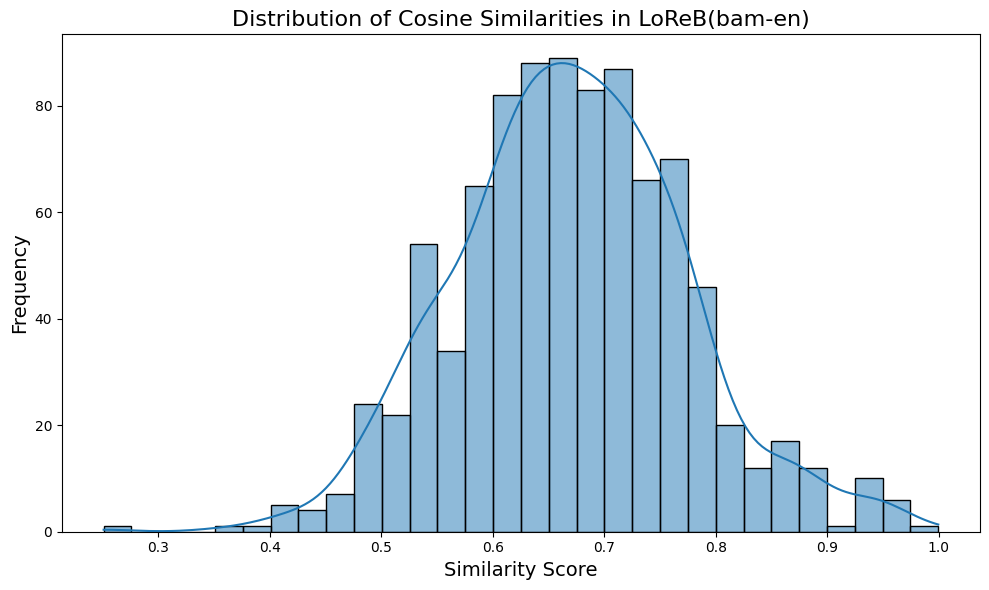

In [40]:
distribution_graph(cosine_bam_en_loc, 'Distribution of Cosine Similarities in LoReB(bam-en)',16, 'Similarity Score',14)

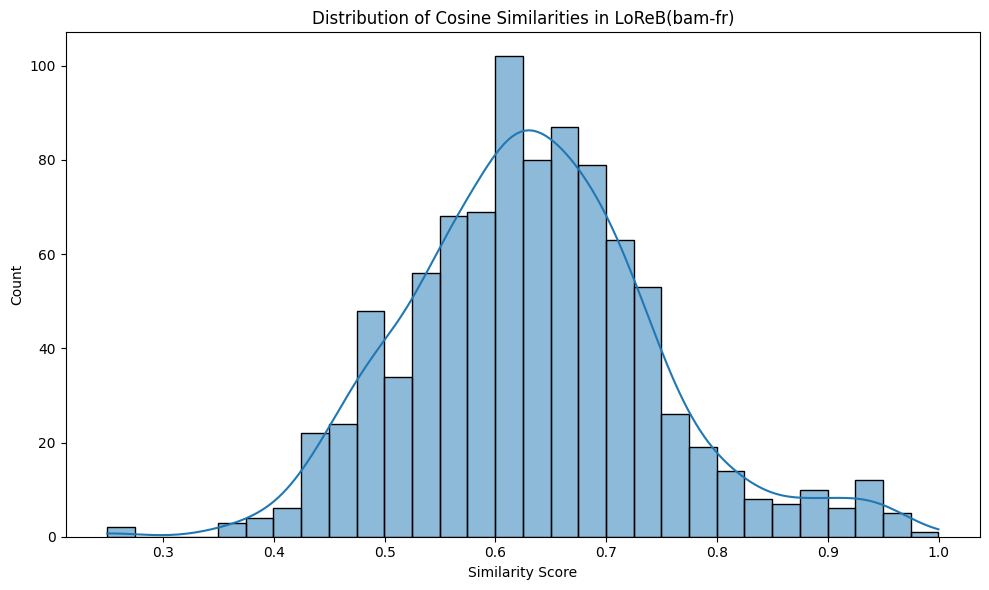

In [33]:
distribution_graph(cosine_bam_fr_loc, 'Distribution of Cosine Similarities in LoReB(bam-fr)',16, 'Similarity Score',14)

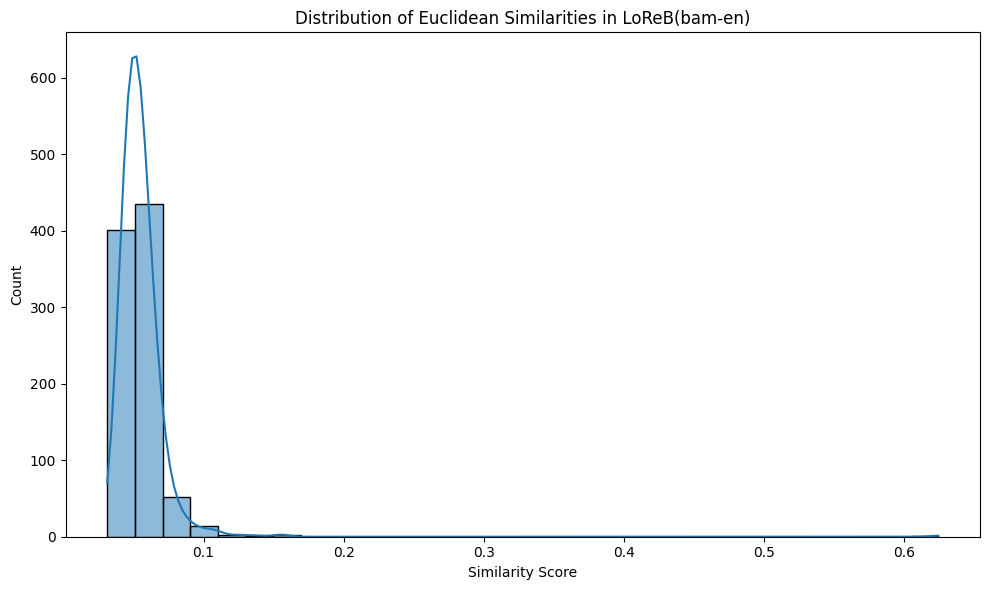

In [34]:
distribution_graph(euclidean_bam_en_loc, 'Distribution of Euclidean Similarities in LoReB(bam-en)', 'Similarity Score')

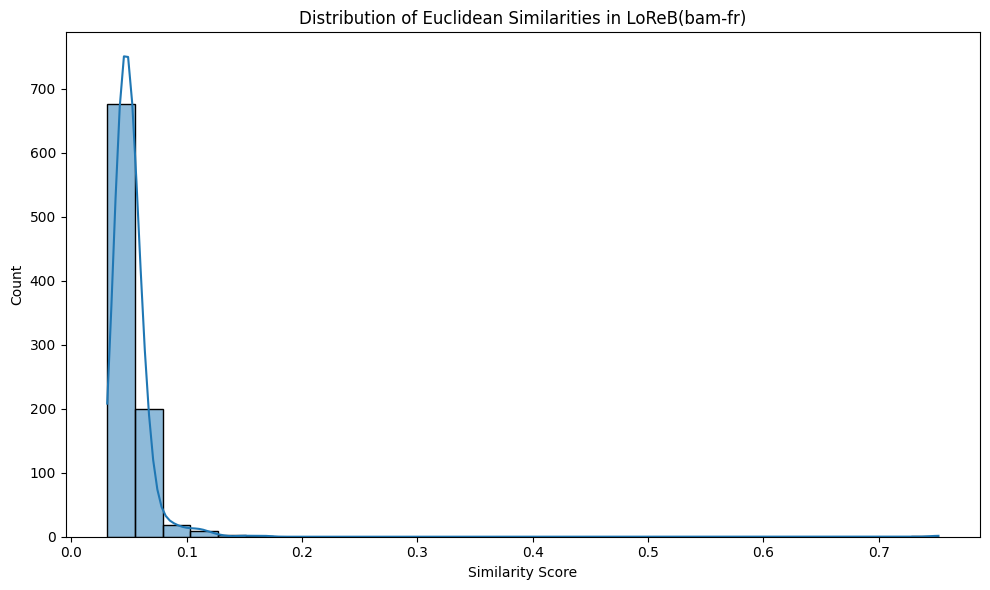

In [35]:
distribution_graph(euclidean_bam_fr_loc, 'Distribution of Euclidean Similarities in LoReB(bam-fr)', 'Similarity Score')

In [51]:
def distribution_graph2(em1, em2, em1_name, em2_name, title_name, title_font, label_name, label_font):
    plt.figure(figsize=(10, 6))
    sns.histplot(em1, kde=True, bins=30, color='blue', alpha=0.3, label=em1_name)
    sns.histplot(em2, kde=True, bins=30, color='red', alpha=0.3, label=em2_name)
    plt.title(title_name, fontsize=title_font)
    plt.xlabel(label_name, fontsize=label_font)
    plt.ylabel('Frequency', fontsize=label_font)
    plt.legend(fontsize=label_font)
    plt.tight_layout()
    plt.show()

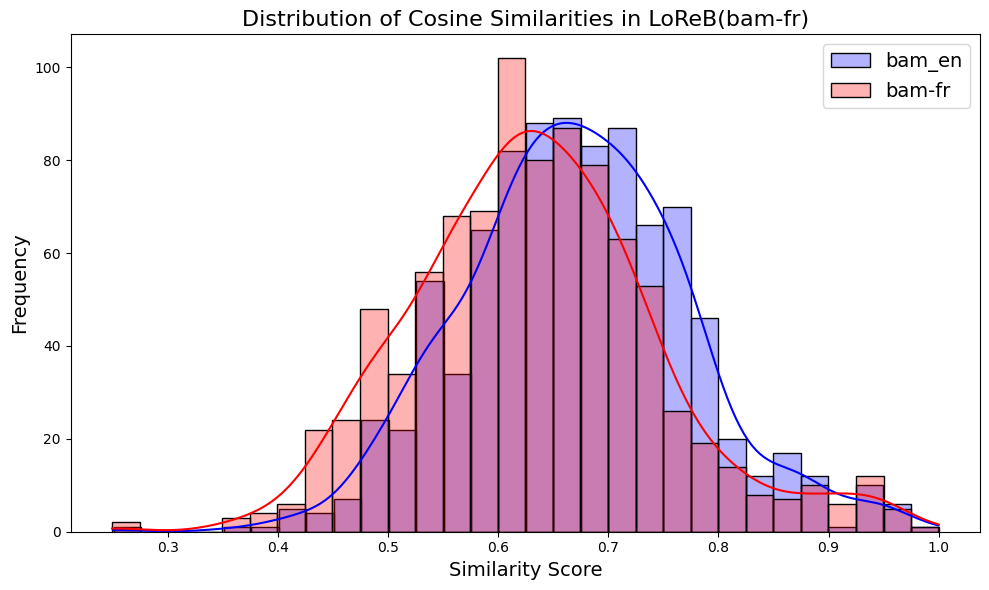

In [52]:
distribution_graph2(cosine_bam_en_loc, cosine_bam_fr_loc, 'bam_en', 'bam-fr', 'Distribution of Cosine Similarities in LoReB(bam-fr)',16, 'Similarity Score',14)

In [ ]:
avg_cosine_bam_en = np.mean(cosine_bam_en)
avg_cosine_bam_fr = np.mean(cosine_bam_fr)

Text(0.5, 1.0, 'Evaluation set measurements')

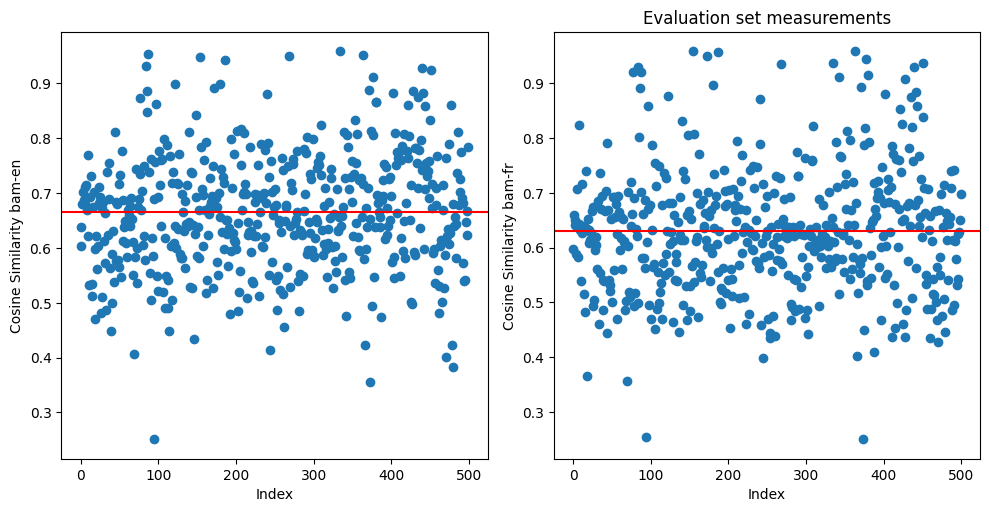

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(range(len(cosine_bam_en)), cosine_bam_en)
plt.axhline(y=avg_cosine_bam_en, color='r', linestyle='-', label=f'Average: {avg_cosine_bam_en:.4f}')
plt.xlabel('Index')
plt.ylabel('Cosine Similarity bam-en')

plt.subplot(1, 2, 2)
plt.scatter(range(len(cosine_bam_fr)), cosine_bam_fr)
plt.axhline(y=avg_cosine_bam_fr, color='r', linestyle='-', label=f'Average: {avg_cosine_bam_fr:.4f}')
plt.xlabel('Index')
plt.ylabel('Cosine Similarity bam-fr')

plt.tight_layout()
plt.title("Evaluation set measurements")

In [ ]:
avg_euclidean_bam_en = np.mean(euclidean_bam_en)
avg_euclidean_bam_fr = np.mean(euclidean_bam_fr)

Text(0.5, 1.0, 'Evaluation set measurements')

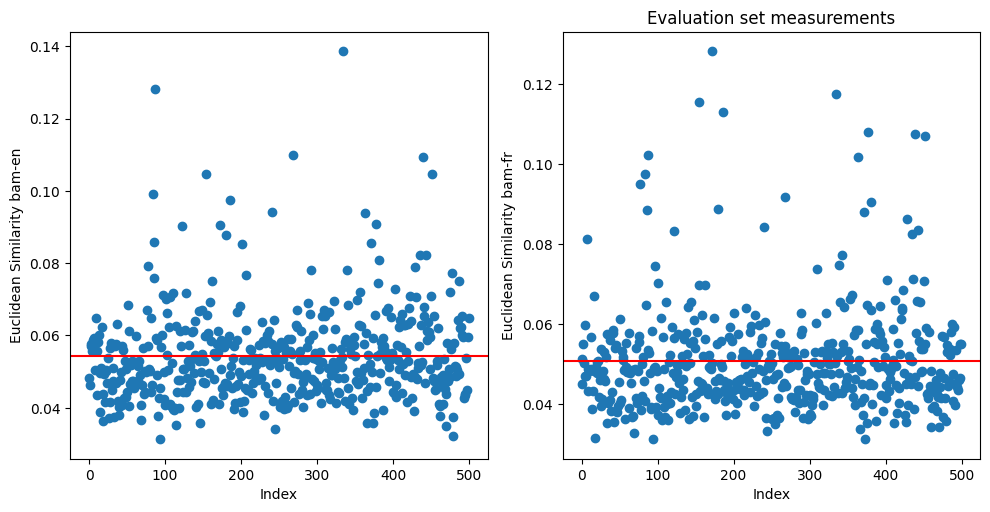

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(range(len(euclidean_bam_en)), euclidean_bam_en)
plt.axhline(y=avg_euclidean_bam_en, color='r', linestyle='-', label=f'Average: {avg_euclidean_bam_en:.4f}')
plt.xlabel('Index')
plt.ylabel('Euclidean Similarity bam-en')

plt.subplot(1, 2, 2)
plt.scatter(range(len(euclidean_bam_fr)), euclidean_bam_fr)
plt.axhline(y=avg_euclidean_bam_fr, color='r', linestyle='-', label=f'Average: {avg_euclidean_bam_fr:.4f}')
plt.xlabel('Index')
plt.ylabel('Euclidean Similarity bam-fr')

plt.tight_layout()
plt.title("Evaluation set measurements")

In [57]:
def flatten_embeddings(embeddings):
  if embeddings.ndim == 3:
    return embeddings.mean(axis=1)
  elif embeddings.ndim == 2:
    return embeddings
  else:
    raise ValueError(f"Invalid embedding shape: {embeddings.shape}")


In [64]:
en_embeddings_loc.ndim

3

In [58]:
en = flatten_embeddings(en_embeddings_loc)
fr = flatten_embeddings(fr_embeddings_loc)
bam = flatten_embeddings(bam_embeddings_loc)

In [62]:
from sklearn.decomposition import PCA

In [70]:
def run_pca_and_plot(em1, em2, em3, em1_name, em2_name, em3_name, title_name):

    # Stack all into one array
    X = np.vstack([em1, em2, em3])
    y = [0] * len(em1) + [1] * len(em1) + [2] * len(em1)

    # PCA
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)

    # Plot
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'green', 'orange']
    labels = [em1_name, em2_name, em3_name]
    for i, color in enumerate(colors):
        idx = [j for j, label in enumerate(y) if label == i]
        plt.scatter(X_reduced[idx, 0], X_reduced[idx, 1], c=color, label=labels[i], alpha=0.6)

    plt.legend()
    plt.title(title_name)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.ylim(-5, 5)
    plt.xlim(-5, 5)
    plt.grid(True)
    plt.show()

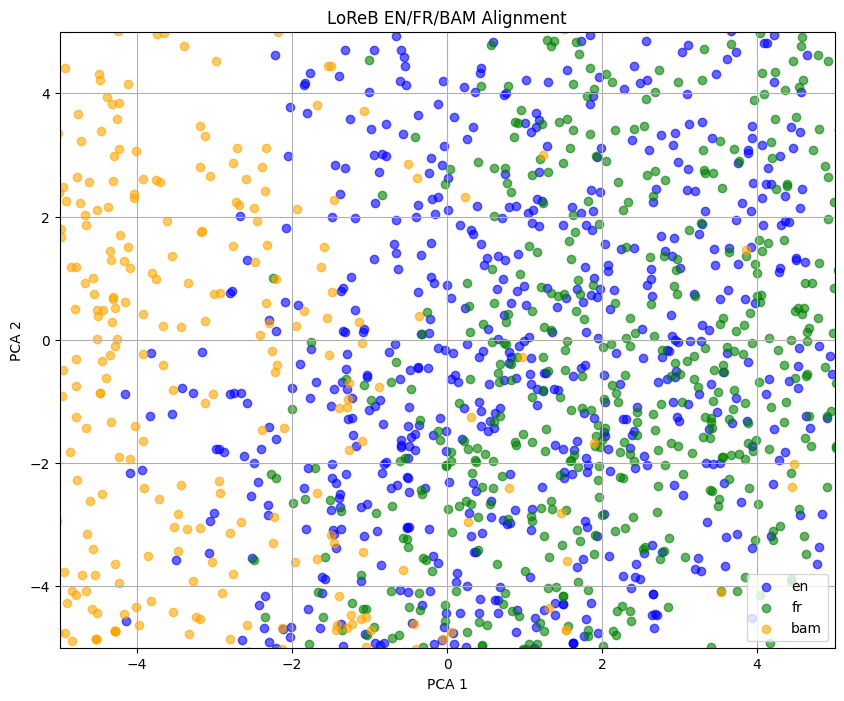

In [71]:
run_pca_and_plot(en, fr, bam, 'en', 'fr', 'bam', 'LoReB EN/FR/BAM Alignment')

In [73]:
enn = flatten_embeddings(en_embeddings)
frn = flatten_embeddings(fr_embeddings)
bamn = flatten_embeddings(bam_embeddings)

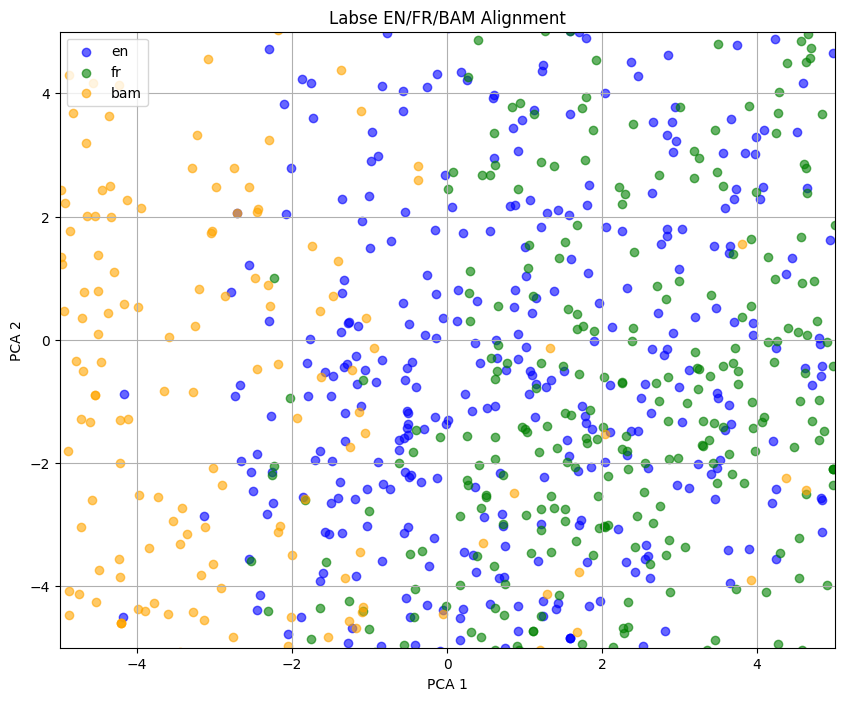

In [75]:
run_pca_and_plot(enn, frn, bamn, 'en', 'fr', 'bam', 'Labse EN/FR/BAM Alignment')